# Python for Data Analysis : Modeling Part

Problem which can be solved:
* 7-class classifications for each drug separately.
* Problem can be transformed to binary classification by union of part of classes into one new class. 
    * For example, "Never Used", "Used over a Decade Ago" form class "Non-user" and all other classes form class "User".
* The best binarization of classes for each attribute.
* Evaluation of risk to be drug consumer for each drug.

For this dataset, I have decided to solve the first problem : *7-class Classification for each drug*

## Import the dataset

In [2]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data", header = None)
columns = ['ID', 'AGE', 'GENDER', 'EDUCATION_LEVEL', 'COUNTRY', 'ETHNICITY', 'NSCORE_VALUE', 'ESCORE_VALUE', 'OSCORE_VALUE', 'ASCORE_VALUE', 
        'CSCORE_VALUE', 'IMPULSIVENESS', 'SENSATION_SEEING', 'ALCOHOL_CONSUMPTION', 'AMPHET_CONSUMPTION', 'AMYL_CONSUMPTION', 'BENZOS_CONSUMPTION', 
        'CAFFEINE_CONSUMPTION', 'CANNABIS_CONSUMPTION', 'CHOCOLATE_CONSUMPTION', 'COKE_CONSUMPTION', 'CRACK_CONSUMPTION', 'ECSTASY_CONSUMPTION', 
        'HEROIN_CONSUMPTION', 'KETAMINE_CONSUMPTION', 'LEGAL_HIGHS_CONSUMPTION', 'LSD_CONSUMPTION', 'METH_CONSUMPTION', 'MAGIC_MUSHROOMS_CONSUMPTION', 
        'NICOTINE_CONSUMPTION', 'SEMER_CONSUMPTION', 'VSA_CONSUMPTION']
df.columns = columns

## Spliting into training and testing set

In [3]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
features = ['AGE', 'GENDER', 'EDUCATION_LEVEL', 'COUNTRY', 'ETHNICITY', 
    'NSCORE_VALUE', 'ESCORE_VALUE', 'OSCORE_VALUE', 'ASCORE_VALUE', 'CSCORE_VALUE', 'IMPULSIVENESS', 'SENSATION_SEEING']

# As we have seen in the analysis, the caffeine is the most consumed drug. So I chose this one for now. 
predict = ['CAFFEINE_CONSUMPTION']

X = df[features].values
y = df[predict].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

##  Support Vector Machine Algorithm for Classification (Support Vector Clustering)

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.
SVMs are one of the most robust prediction methods.

In [ ]:
from sklearn import metrics
from sklearn.svm import SVC

In [ ]:
def accuracy(y_test, pred): 
    accuracy = metrics.accuracy_score(y_test,pred)
    print(f"The accuracy score is : {round(accuracy*100, 2)}%.")

### By-default parameters

In [ ]:
svm = SVC()
svm.fit(X_train, y_train.ravel())
pred = svm.predict(X_test)
accuracy(y_test,pred)

The accuracy score is : 69.96%.


### With Grid-search

In [ ]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.01, 0.1, 1], # The strength of the regularization is inversely proportional to C
			'gamma': [1, 0.1, 0.01], # Kernel coefficient for rbf, poly and sigmoid
			'kernel': ['poly', 'rbf']} # kernel type to be used in the algorithm

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train, y_train.ravel()) 


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] C=0.01, gamma=1, kernel=poly ....................................
[CV] ........ C=0.01, gamma=1, kernel=poly, score=0.663, total=   0.2s
[CV] C=0.01, gamma=1, kernel=poly ....................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[CV] ........ C=0.01, gamma=1, kernel=poly, score=0.667, total=   0.2s
[CV] C=0.01, gamma=1, kernel=poly ....................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[CV] ........ C=0.01, gamma=1, kernel=poly, score=0.678, total=   0.2s
[CV] C=0.01, gamma=1, kernel=poly ....................................
[CV] ........ C=0.01, gamma=1, kernel=poly, score=0.659, total=   0.2s
[CV] C=0.01, gamma=1, kernel=poly ....................................
[CV] ........ C=0.01, gamma=1, kernel=poly, score=0.639, to

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['poly', 'rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.01, gamma=1)


In [ ]:
grid_predictions = grid.predict(X_test) 
accuracy(y_test,grid_predictions) 

The accuracy score is : 69.96%.


## Decision Tree 

Decision tree builds classification or regression models in the form of a tree structure. <br/>
It breaks down a data set into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. <br/>
The final result is a tree with decision nodes and leaf nodes.

**DecisionTreeClassifier** is a class capable of performing multi-class classification on a dataset.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(X_train, y_train.ravel())
pred = clf_dtc.predict(X_test)
accuracy(y_test,pred)


The accuracy score is : 54.42%.


[Text(182.80312500000002, 201.90857142857143, 'X[0] <= 0.21\ngini = 0.415\nsamples = 1319\nvalue = [17, 5, 15, 39, 78, 176, 989]'),
 Text(87.76875000000001, 170.84571428571428, 'X[8] <= -0.377\ngini = 0.476\nsamples = 782\nvalue = [8, 1, 9, 25, 58, 135, 546]'),
 Text(54.6375, 139.78285714285715, 'X[4] <= -0.269\ngini = 0.545\nsamples = 296\nvalue = [6, 1, 3, 15, 25, 57, 189]'),
 Text(34.875, 108.72, 'X[5] <= 0.469\ngini = 0.525\nsamples = 278\nvalue = [6, 0, 3, 12, 25, 49, 183]'),
 Text(18.6, 77.65714285714284, 'X[4] <= -0.409\ngini = 0.599\nsamples = 145\nvalue = [3, 0, 1, 11, 11, 36, 83]'),
 Text(9.3, 46.59428571428572, 'X[8] <= -1.13\ngini = 0.625\nsamples = 4\nvalue = [1, 0, 0, 1, 0, 2, 0]'),
 Text(4.65, 15.531428571428563, '\n  (...)  \n'),
 Text(13.950000000000001, 15.531428571428563, '\n  (...)  \n'),
 Text(27.900000000000002, 46.59428571428572, 'X[6] <= 1.37\ngini = 0.584\nsamples = 141\nvalue = [2, 0, 1, 10, 11, 34, 83]'),
 Text(23.25, 15.531428571428563, '\n  (...)  \n'),
 Te

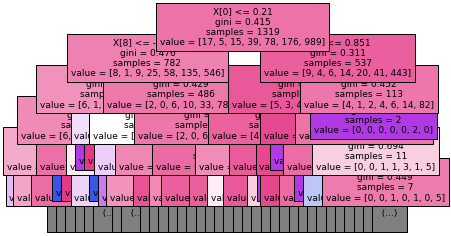

In [ ]:
# Illisible...
# plot_tree(clf_dtc, max_depth = 5, filled=True , fontsize=9)

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
			'splitter': ['random', 'best'], 
			'max_depth': [5,10,25], 
            'random_state': [None, 1, 5, 10]} 

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train, y_train.ravel()) 

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] criterion=gini, max_depth=5, random_state=None, splitter=random .
[CV]  criterion=gini, max_depth=5, random_state=None, splitter=random, score=0.723, total=   0.0s
[CV] criterion=gini, max_depth=5, random_state=None, splitter=random .
[CV]  criterion=gini, max_depth=5, random_state=None, splitter=random, score=0.750, total=   0.0s
[CV] criterion=gini, max_depth=5, random_state=None, splitter=random .
[CV]  criterion=gini, max_depth=5, random_state=None, splitter=random, score=0.742, total=   0.0s
[CV] criterion=gini, max_depth=5, random_state=None, splitter=random .
[CV]  criterion=gini, max_depth=5, random_state=None, splitter=random, score=0.742, total=   0.0s
[CV] criterion=gini, max_depth=5, random_state=None, splitter=random .
[CV]  criterion=gini, max_depth=5, random_state=None, splitter=random, score=0.745, total=   0.0s
[CV] criterion=gini, max_depth=5, random_state=None, splitter=best ...
[CV]  criterion=gini, 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 25],
                         'random_state': [None, 1, 5, 10],
                         'splitter': ['random', 'best']},
             verbose=3)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'criterion': 'entropy', 'max_depth': 5, 'random_state': 1, 'splitter': 'random'}
DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1,
                       splitter='random')


In [ ]:
grid_predictions = grid.predict(X_test) 
accuracy(y_test,grid_predictions)

The accuracy score is : 69.79%.


## Random Forest

Random forest has nearly the same hyperparameters as a decision tree or a bagging classifier.
Random forest adds additional randomness to the model, while growing the trees. 

Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.ravel())
pred = rfc.predict(X_test)
accuracy(y_test,pred)

The accuracy score is : 70.14%.


In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
			'max_depth': [3,5,10,15], 
            'n_estimators' : [10, 15, 25, 50, 100], 
            'bootstrap' : ['True', 'False'], 
            'random_state': [None, 1, 5, 10], 
            'min_samples_split' : [1,2,5,10,25 ], 
            'min_samples_leaf' : [1,2,5,10]
            } 

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3, n_jobs=-1) 

# fitting the model for grid search 
grid.fit(X_train, y_train.ravel()) 

Fitting 5 folds for each of 6400 candidates, totalling 32000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 362 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 856 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2822 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4076 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5082 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 6334 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 7772 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 9360 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 11050 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 12914 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 14812 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 17488 tasks

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': ['True', 'False'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [1, 2, 5, 10, 25],
                         'n_estimators': [10, 15, 25, 50, 100],
                         'random_state': [None, 1, 5, 10]},
             verbose=3)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'bootstrap': 'True', 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 1}
RandomForestClassifier(bootstrap='True', max_depth=15, min_samples_leaf=5,
                       n_estimators=10, random_state=1)


In [ ]:
grid_predictions = grid.predict(X_test) 
accuracy(y_test,grid_predictions)

The accuracy score is : 70.14%.


In [ ]:
def modeling_for_each_drug(drug_name): 
    features = ['AGE', 'GENDER', 'EDUCATION_LEVEL', 'COUNTRY', 'ETHNICITY', 'NSCORE_VALUE', 'ESCORE_VALUE', 'OSCORE_VALUE', 'ASCORE_VALUE', 'CSCORE_VALUE', 'IMPULSIVENESS', 'SENSATION_SEEING']
    predict = [drug_name]

    X = df[features].values
    y = df[predict].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

    rfc = RandomForestClassifier(bootstrap='True', max_depth=15, min_samples_leaf=5, n_estimators=10, random_state=1, n_jobs=-1)
    rfc.fit(X_train, y_train.ravel())
    pred = rfc.predict(X_test)
    print(drug_name)
    accuracy(y_test,pred)
    pickle.dump(rfc, open('models/'+drug_name+'_prediction.pickle', 'wb'))
    print("-"*50)
    



In [ ]:
drugs = ['ALCOHOL_CONSUMPTION', 'AMPHET_CONSUMPTION', 'AMYL_CONSUMPTION', 'BENZOS_CONSUMPTION', 
        'CAFFEINE_CONSUMPTION', 'CANNABIS_CONSUMPTION', 'CHOCOLATE_CONSUMPTION', 'COKE_CONSUMPTION', 'CRACK_CONSUMPTION', 'ECSTASY_CONSUMPTION', 
        'HEROIN_CONSUMPTION', 'KETAMINE_CONSUMPTION', 'LEGAL_HIGHS_CONSUMPTION', 'LSD_CONSUMPTION', 'METH_CONSUMPTION', 'MAGIC_MUSHROOMS_CONSUMPTION', 
        'NICOTINE_CONSUMPTION', 'SEMER_CONSUMPTION', 'VSA_CONSUMPTION']

for drug in drugs:
    modeling_for_each_drug(drug)

ALCOHOL_CONSUMPTION
The accuracy score is : 38.69%.
--------------------------------------------------
AMPHET_CONSUMPTION
The accuracy score is : 48.41%.
--------------------------------------------------
AMYL_CONSUMPTION
The accuracy score is : 68.37%.
--------------------------------------------------
BENZOS_CONSUMPTION
The accuracy score is : 51.94%.
--------------------------------------------------
CAFFEINE_CONSUMPTION
The accuracy score is : 74.91%.
--------------------------------------------------
CANNABIS_CONSUMPTION
The accuracy score is : 39.93%.
--------------------------------------------------
CHOCOLATE_CONSUMPTION
The accuracy score is : 39.05%.
--------------------------------------------------
COKE_CONSUMPTION
The accuracy score is : 50.71%.
--------------------------------------------------
CRACK_CONSUMPTION
The accuracy score is : 87.46%.
--------------------------------------------------
ECSTASY_CONSUMPTION
The accuracy score is : 53.53%.
---------------------------

## K-Nearest Neighbours (KNN)

An approach to data classification that estimates how likely a data point is to be a member of one group or the other 
depending on what group the data points nearest to it are in.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train,y_train.ravel())
pred = clf.predict(X_test)
accuracy(y_test,pred)

The accuracy score is : 63.6%.


In [ ]:
param_grid = {'n_neighbors': [8,9,10,11],
			'weights': ['uniform', 'distance'], 
            'algorithm' : ['ball_tree', 'kd_tree', 'brute', 'auto'], 
            'leaf_size' : [5,10,25, 30, 50]} 

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train, y_train.ravel()) 

[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=uniform, score=0.746, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=uniform, score=0.750, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=uniform, score=0.742, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=uniform, score=0.738, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=distance, score=0.750, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, weights=distance, sco

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                         'leaf_size': [5, 10, 25, 30, 50],
                         'n_neighbors': [8, 9, 10, 11],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 11, 'weights': 'distance'}
KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, n_neighbors=11,
                     weights='distance')


In [ ]:
grid_predictions = grid.predict(X_test) 
accuracy(y_test,grid_predictions)

The accuracy score is : 69.79%.


## Deep Learning

In [206]:
import tensorflow as tf
from tensorflow              import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Input

In [207]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data", header = None)
columns = ['ID', 'AGE', 'GENDER', 'EDUCATION_LEVEL', 'COUNTRY', 'ETHNICITY', 'NSCORE_VALUE', 'ESCORE_VALUE', 'OSCORE_VALUE', 'ASCORE_VALUE', 
        'CSCORE_VALUE', 'IMPULSIVENESS', 'SENSATION_SEEING', 'ALCOHOL_CONSUMPTION', 'AMPHET_CONSUMPTION', 'AMYL_CONSUMPTION', 'BENZOS_CONSUMPTION', 
        'CAFFEINE_CONSUMPTION', 'CANNABIS_CONSUMPTION', 'CHOCOLATE_CONSUMPTION', 'COKE_CONSUMPTION', 'CRACK_CONSUMPTION', 'ECSTASY_CONSUMPTION', 
        'HEROIN_CONSUMPTION', 'KETAMINE_CONSUMPTION', 'LEGAL_HIGHS_CONSUMPTION', 'LSD_CONSUMPTION', 'METH_CONSUMPTION', 'MAGIC_MUSHROOMS_CONSUMPTION', 
        'NICOTINE_CONSUMPTION', 'SEMER_CONSUMPTION', 'VSA_CONSUMPTION']
df.columns = columns

In [208]:
features_DL = ['AGE', 'GENDER', 'EDUCATION_LEVEL', 'COUNTRY', 'ETHNICITY', 
    'NSCORE_VALUE', 'ESCORE_VALUE', 'OSCORE_VALUE', 'ASCORE_VALUE', 'CSCORE_VALUE', 'IMPULSIVENESS', 'SENSATION_SEEING']

predict_DL = ['ALCOHOL_CONSUMPTION', 'AMPHET_CONSUMPTION', 'AMYL_CONSUMPTION', 'BENZOS_CONSUMPTION', 
        'CAFFEINE_CONSUMPTION', 'CANNABIS_CONSUMPTION', 'CHOCOLATE_CONSUMPTION', 'COKE_CONSUMPTION', 'CRACK_CONSUMPTION', 'ECSTASY_CONSUMPTION', 
        'HEROIN_CONSUMPTION', 'KETAMINE_CONSUMPTION', 'LEGAL_HIGHS_CONSUMPTION', 'LSD_CONSUMPTION', 'METH_CONSUMPTION', 'MAGIC_MUSHROOMS_CONSUMPTION', 
        'NICOTINE_CONSUMPTION', 'SEMER_CONSUMPTION', 'VSA_CONSUMPTION']

for _ in predict_DL:
    df[_] = df[_].apply(lambda x : 1 if x == "CL6" else 0)

print(df[(df['CAFFEINE_CONSUMPTION'] == 1)]['CAFFEINE_CONSUMPTION'])


X_DL = df[features_DL].values
y_DL = df[predict_DL].values

X_train, X_test, y_train, y_test = train_test_split(X_DL, y_DL, test_size=0.20)

0       1
1       1
2       1
4       1
5       1
       ..
1874    1
1877    1
1882    1
1883    1
1884    1
Name: CAFFEINE_CONSUMPTION, Length: 1385, dtype: int64


In [237]:
model = Sequential()
model.add(Dense(224, input_dim=len(features_DL), activation="relu"))
model.add(Dense(len(predict_DL), activation="sigmoid"))

In [238]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [240]:
model.fit(X_train, y_train, epochs=200, batch_size=10)


Epoch 1/200
151/151 [==============================] - 1s 4ms/step - loss: 0.0752 - accuracy: 0.4887
Epoch 2/200
151/151 [==============================] - 1s 5ms/step - loss: 0.0760 - accuracy: 0.4980
Epoch 3/200
151/151 [==============================] - 1s 4ms/step - loss: 0.0746 - accuracy: 0.4881
Epoch 4/200
151/151 [==============================] - 1s 3ms/step - loss: 0.0738 - accuracy: 0.4841
Epoch 5/200
151/151 [==============================] - 1s 5ms/step - loss: 0.0733 - accuracy: 0.4967
Epoch 6/200
151/151 [==============================] - 1s 5ms/step - loss: 0.0736 - accuracy: 0.4927
Epoch 7/200
151/151 [==============================] - 1s 4ms/step - loss: 0.0728 - accuracy: 0.4973
Epoch 8/200
151/151 [==============================] - 1s 4ms/step - loss: 0.0722 - accuracy: 0.5000
Epoch 9/200
151/151 [==============================] - 0s 3ms/step - loss: 0.0730 - accuracy: 0.5040
Epoch 10/200
151/151 [==============================] - 0s 3ms/step - loss: 0.0722 - accura

In [241]:
_, accuracy = model.evaluate(X_train, y_train)

48/48 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.5073


In [242]:
predictions = model.predict(X_test)
predictions = [[round(x[_]) for _ in range(len(x))] for x in predictions]
for _ in range(50):
    print(f"{predictions[_]} expected {y_test[_]}")


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] expected [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] expected [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] expected [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] expected [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] expected [1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] expected [0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] expected [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] expected [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] expected [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 

### Keras tuner : Looking for best parameters

In [ ]:
!pip install -q -U keras-tuner

In [230]:
import kerastuner as kt

def model_builder(hp):
    model = Sequential()
    hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
    model.add(keras.layers.Dense(units = hp_units, input_dim=len(features_DL), activation = 'relu'))
       
    model.add(keras.layers.Dense(len(predict_DL), activation="sigmoid"))

    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 

    model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = 'binary_crossentropy', 
                metrics = ['accuracy'])

    return model

In [231]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 10,
                     factor = 3,
                     directory = 'my_dir',
                     project_name = 'intro_to_kt')

INFO:tensorflow:Reloading Oracle from existing project my_dir/intro_to_kt/oracle.json
INFO:tensorflow:Reloading Tuner from my_dir/intro_to_kt/tuner0.json


In [232]:
tuner.search(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))


Trial 5 Complete [00h 00m 04s]
val_accuracy: 0.4721485376358032

Best val_accuracy So Far: 0.48275861144065857
Total elapsed time: 00h 00m 23s
INFO:tensorflow:Oracle triggered exit


In [246]:
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
print(f"Units : {best_hps.get('units')} \nLearning rate : {best_hps.get('learning_rate')}")

Units : 224 
Learning rate : 0.01
